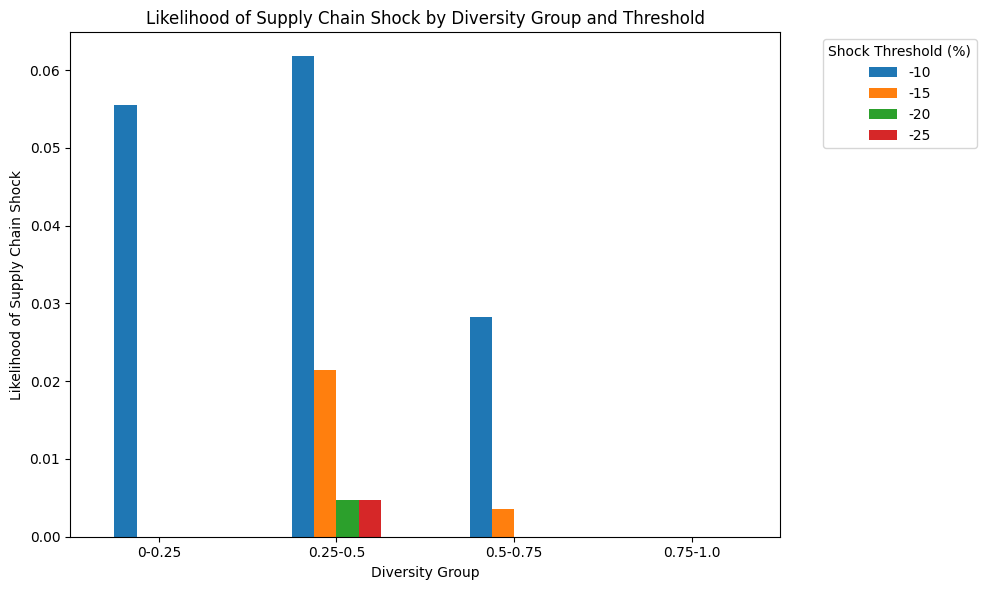

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('./final_agg_data.csv')  # Replace with your file path

# Function to classify diversity into groups
def classify_diversity(diversity):
    if diversity <= 0.25:
        return '0-0.25'
    elif diversity <= 0.5:
        return '0.25-0.5'
    elif diversity <= 0.75:
        return '0.5-0.75'
    else:
        return '0.75-1.0'

# Apply the classification
df['diversity_group'] = df['diversity'].apply(classify_diversity)

# Define shock thresholds
shock_thresholds = [-10, -15, -20, -25]

# Initialize a dictionary to hold the results
shock_likelihood = {threshold: [] for threshold in shock_thresholds}

# Calculate likelihood of shock for each group and threshold
for threshold in shock_thresholds:
    df[f'supply_chain_shock_{threshold}'] = df['tons_percent_change'] < threshold
    for group in sorted(df['diversity_group'].unique()):
        likelihood = df[df['diversity_group'] == group][f'supply_chain_shock_{threshold}'].mean()
        shock_likelihood[threshold].append(likelihood)

# Convert results to DataFrame for easier plotting
shock_likelihood_df = pd.DataFrame(shock_likelihood, index=sorted(df['diversity_group'].unique()))

# Plot
shock_likelihood_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Diversity Group')
plt.ylabel('Likelihood of Supply Chain Shock')
plt.title('Likelihood of Supply Chain Shock by Diversity Group and Threshold')
plt.xticks(rotation=0)
plt.legend(title='Shock Threshold (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


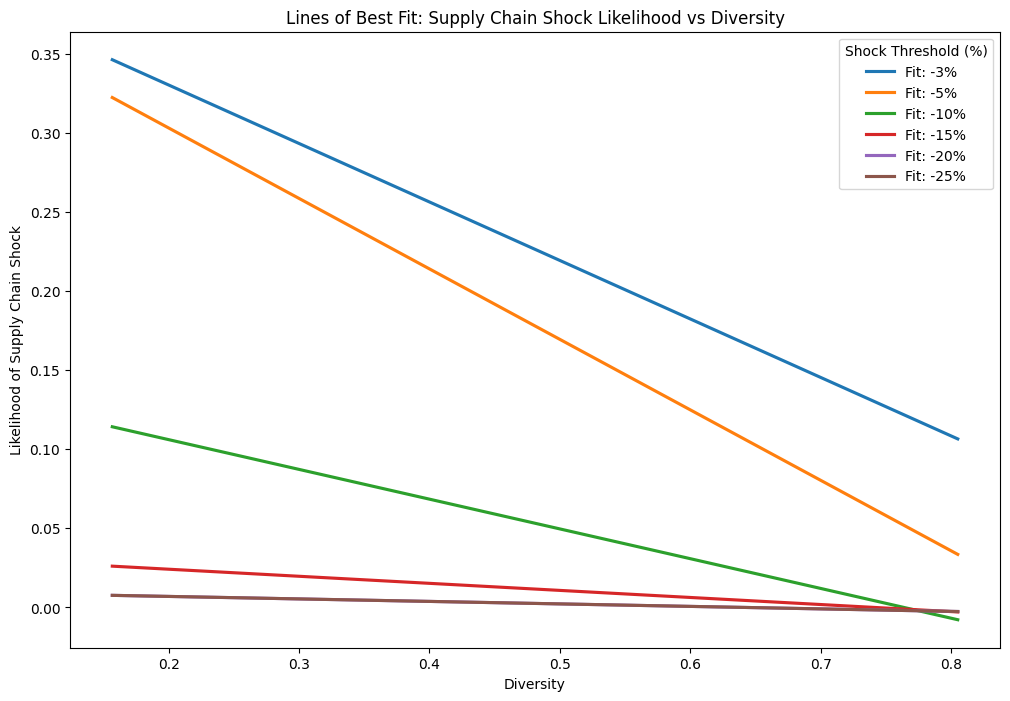

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('./final_agg_data.csv')

# Define shock thresholds
shock_thresholds = [-3, -5, -10, -15, -20, -25]

# Prepare a DataFrame for plotting
plot_data = []

# Calculate likelihood of shock for each threshold and diversity score
for threshold in shock_thresholds:
    df[f'supply_chain_shock_{threshold}'] = df['tons_percent_change'] < threshold
    for diversity in df['diversity']:
        likelihood = df[df['diversity'] == diversity][f'supply_chain_shock_{threshold}'].mean()
        plot_data.append({'Diversity': diversity, 'Likelihood': likelihood, 'Threshold': threshold})

# Convert list to DataFrame
plot_df = pd.DataFrame(plot_data)

# Plotting
plt.figure(figsize=(12, 8))

# Adding lines of best fit for each threshold without showing scatter points
for threshold in shock_thresholds:
    sns.regplot(
        data=plot_df[plot_df['Threshold'] == threshold],
        x='Diversity', y='Likelihood', 
        scatter=False,  # This ensures scatter points are not plotted
        label=f'Fit: {threshold}%', 
        order=1,  # This specifies the order of the polynomial for the fit line
        ci=None  # This disables the confidence interval for a cleaner look
    )

plt.title('Lines of Best Fit: Supply Chain Shock Likelihood vs Diversity')
plt.xlabel('Diversity')
plt.ylabel('Likelihood of Supply Chain Shock')
plt.legend(title='Shock Threshold (%)')
plt.show()



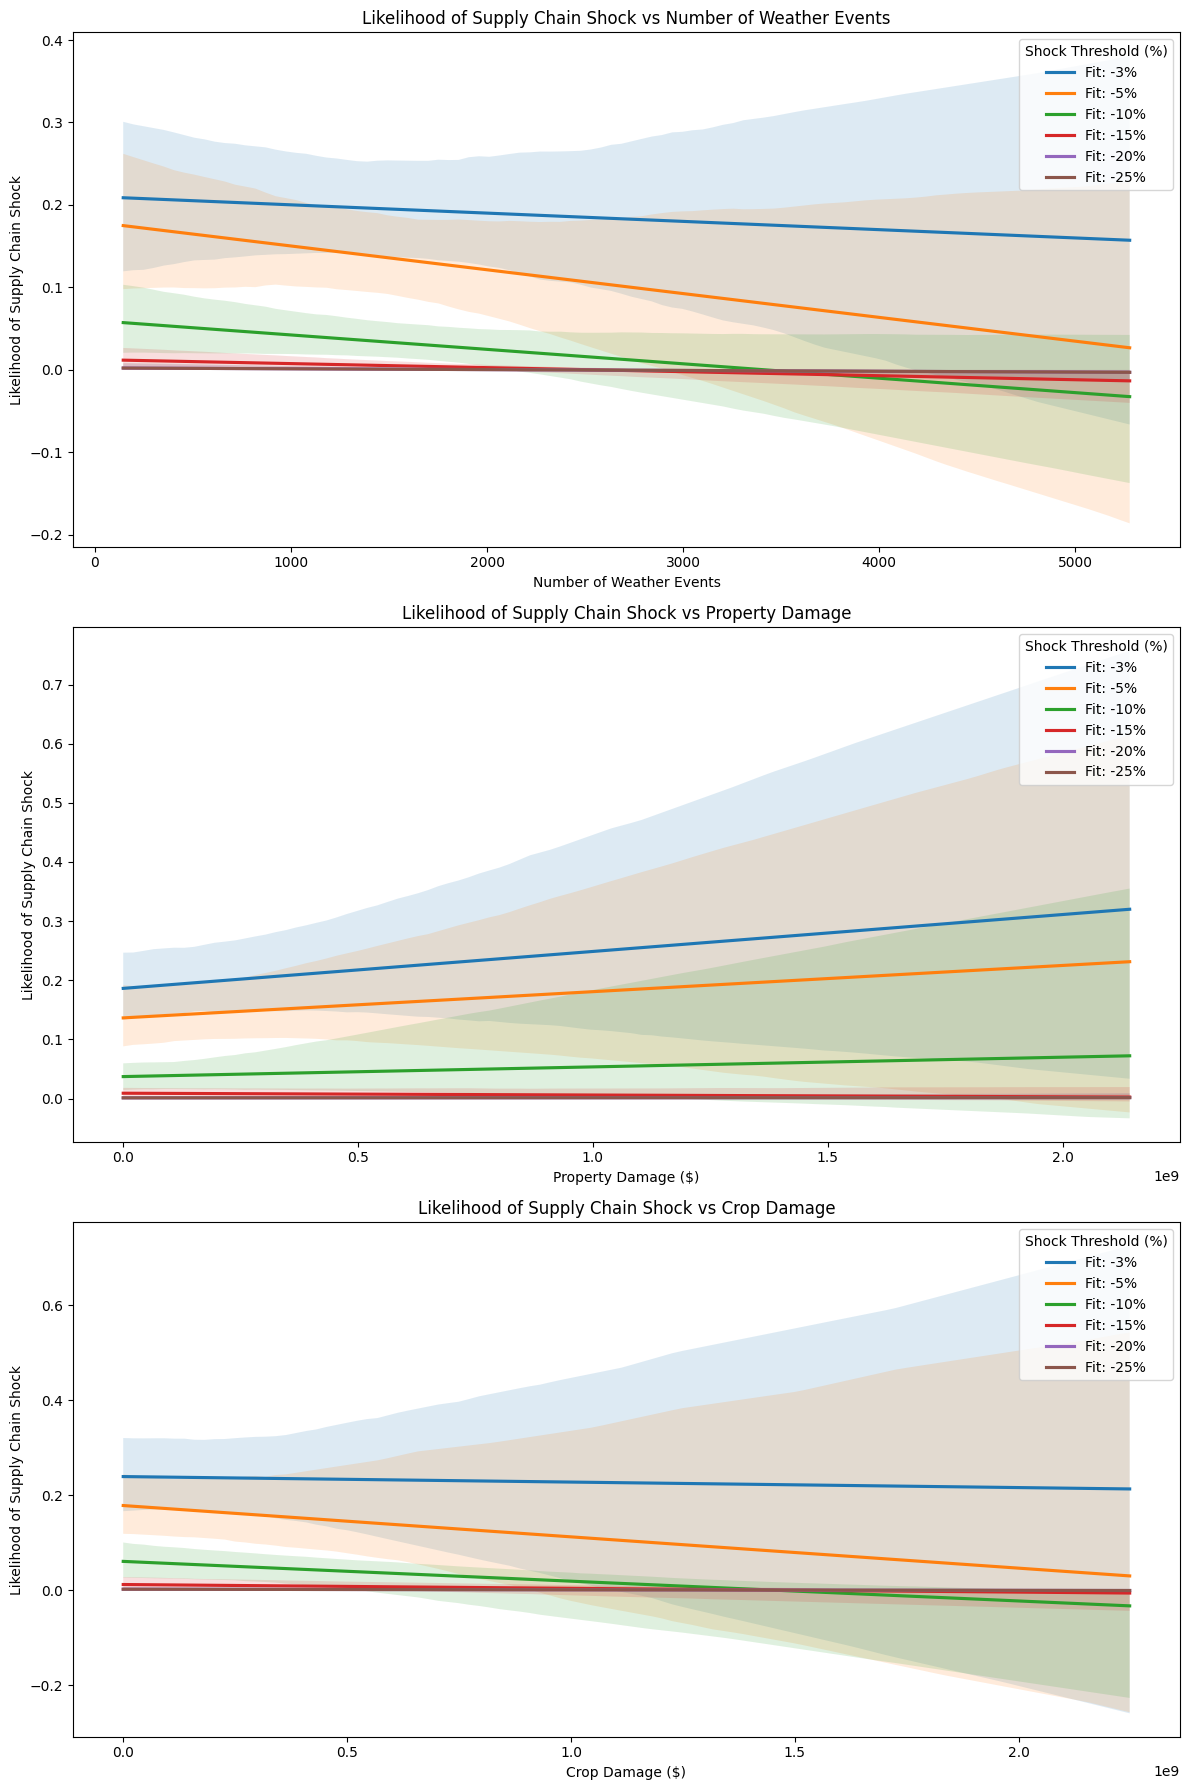

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('./final_agg_data.csv')

# Define shock thresholds
shock_thresholds = [-3, -5, -10, -15, -20, -25]

# Calculate likelihood of shock for each threshold
for threshold in shock_thresholds:
    df[f'supply_chain_shock_{threshold}'] = df['tons_percent_change'] < threshold

# Prepare a DataFrame for plotting for each weather variable
plot_data_events = []
plot_data_property = []
plot_data_crops = []

# Calculate likelihood of shock for each weather-related variable
for threshold in shock_thresholds:
    # For NUMBER_OF_EVENTS
    grouped_events = df.groupby('NUMBER_OF_EVENTS')[f'supply_chain_shock_{threshold}'].mean().reset_index()
    for _, row in grouped_events.iterrows():
        plot_data_events.append({'NUMBER_OF_EVENTS': row['NUMBER_OF_EVENTS'], 'Likelihood': row[f'supply_chain_shock_{threshold}'], 'Threshold': threshold})
    
    # For DAMAGE_PROPERTY
    grouped_property = df.groupby('DAMAGE_PROPERTY')[f'supply_chain_shock_{threshold}'].mean().reset_index()
    for _, row in grouped_property.iterrows():
        plot_data_property.append({'DAMAGE_PROPERTY': row['DAMAGE_PROPERTY'], 'Likelihood': row[f'supply_chain_shock_{threshold}'], 'Threshold': threshold})
    
    # For DAMAGE_CROPS
    grouped_crops = df.groupby('DAMAGE_CROPS')[f'supply_chain_shock_{threshold}'].mean().reset_index()
    for _, row in grouped_crops.iterrows():
        plot_data_crops.append({'DAMAGE_CROPS': row['DAMAGE_CROPS'], 'Likelihood': row[f'supply_chain_shock_{threshold}'], 'Threshold': threshold})

# Convert lists to DataFrames
plot_df_events = pd.DataFrame(plot_data_events)
plot_df_property = pd.DataFrame(plot_data_property)
plot_df_crops = pd.DataFrame(plot_data_crops)

# Plotting with weather data
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Lines of best fit for NUMBER_OF_EVENTS
for threshold in shock_thresholds:
    sns.regplot(
        data=plot_df_events[plot_df_events['Threshold'] == threshold],
        x='NUMBER_OF_EVENTS', y='Likelihood', 
        scatter=False, 
        ax=axs[0], 
        label=f'Fit: {threshold}%')

# Lines of best fit for DAMAGE_PROPERTY
for threshold in shock_thresholds:
    sns.regplot(
        data=plot_df_property[plot_df_property['Threshold'] == threshold],
        x='DAMAGE_PROPERTY', y='Likelihood', 
        scatter=False, 
        ax=axs[1], 
        label=f'Fit: {threshold}%')

# Lines of best fit for DAMAGE_CROPS
for threshold in shock_thresholds:
    sns.regplot(
        data=plot_df_crops[plot_df_crops['Threshold'] == threshold],
        x='DAMAGE_CROPS', y='Likelihood', 
        scatter=False, 
        ax=axs[2], 
        label=f'Fit: {threshold}%')

# Set titles and labels
axs[0].set_title('Likelihood of Supply Chain Shock vs Number of Weather Events')
axs[0].set_xlabel('Number of Weather Events')
axs[0].set_ylabel('Likelihood of Supply Chain Shock')
axs[0].legend(title='Shock Threshold (%)')

axs[1].set_title('Likelihood of Supply Chain Shock vs Property Damage')
axs[1].set_xlabel('Property Damage ($)')
axs[1].set_ylabel('Likelihood of Supply Chain Shock')
axs[1].legend(title='Shock Threshold (%)')

axs[2].set_title('Likelihood of Supply Chain Shock vs Crop Damage')
axs[2].set_xlabel('Crop Damage ($)')
axs[2].set_ylabel('Likelihood of Supply Chain Shock')
axs[2].legend(title='Shock Threshold (%)')

plt.tight_layout()
plt.show()


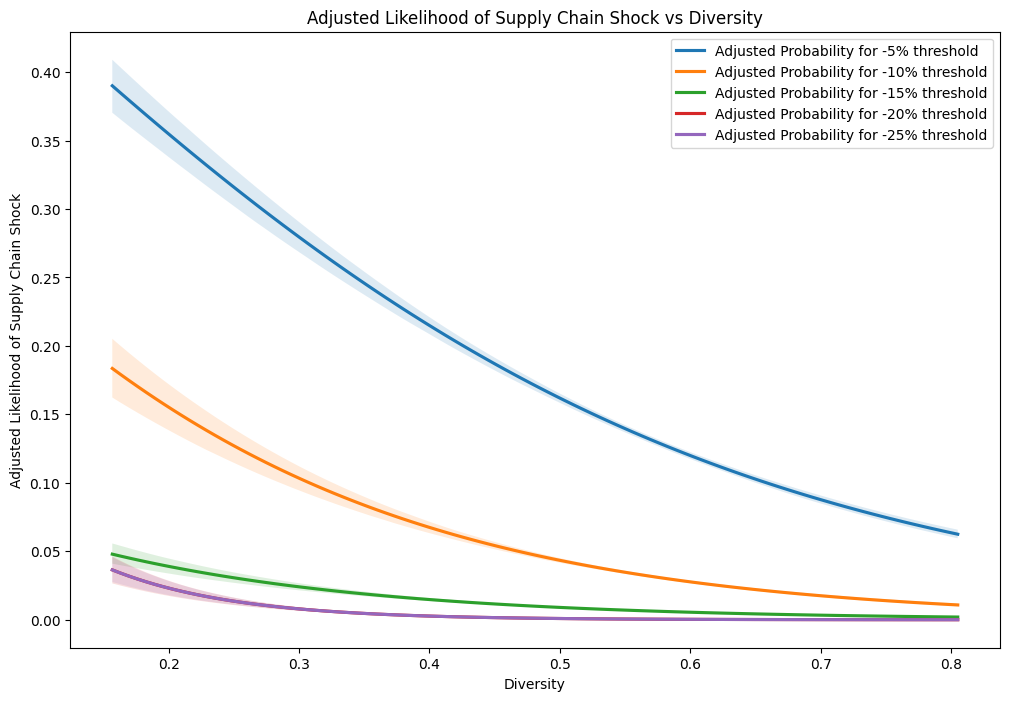

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('./final_agg_data.csv')

# Define the list of thresholds
thresholds = [-5, -10, -15, -20, -25]

# Logistic regression, with weather variables as predictors
X = df[['diversity', 'NUMBER_OF_EVENTS', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'FAH']]
X = sm.add_constant(X)  # Adds a constant term to the predictors

# Plotting
plt.figure(figsize=(12, 8))

for threshold in thresholds:
    # Define supply_chain_shock for the current threshold
    df['supply_chain_shock'] = df['tons_percent_change'] < threshold

    # Fit the model
    logit_model = sm.Logit(df['supply_chain_shock'], X).fit(disp=0)  # disp=0 suppresses the output

    # Predict the probabilities adjusted for weather
    df['adjusted_probability'] = logit_model.predict(X)

    # Add logistic regression line to the plot
    sns.regplot(
        data=df,
        x='diversity',
        y='adjusted_probability',
        scatter=False,
        logistic=True,
        label=f'Adjusted Probability for {threshold}% threshold'
    )

plt.title('Adjusted Likelihood of Supply Chain Shock vs Diversity')
plt.xlabel('Diversity')
plt.ylabel('Adjusted Likelihood of Supply Chain Shock')
plt.legend()
plt.show()


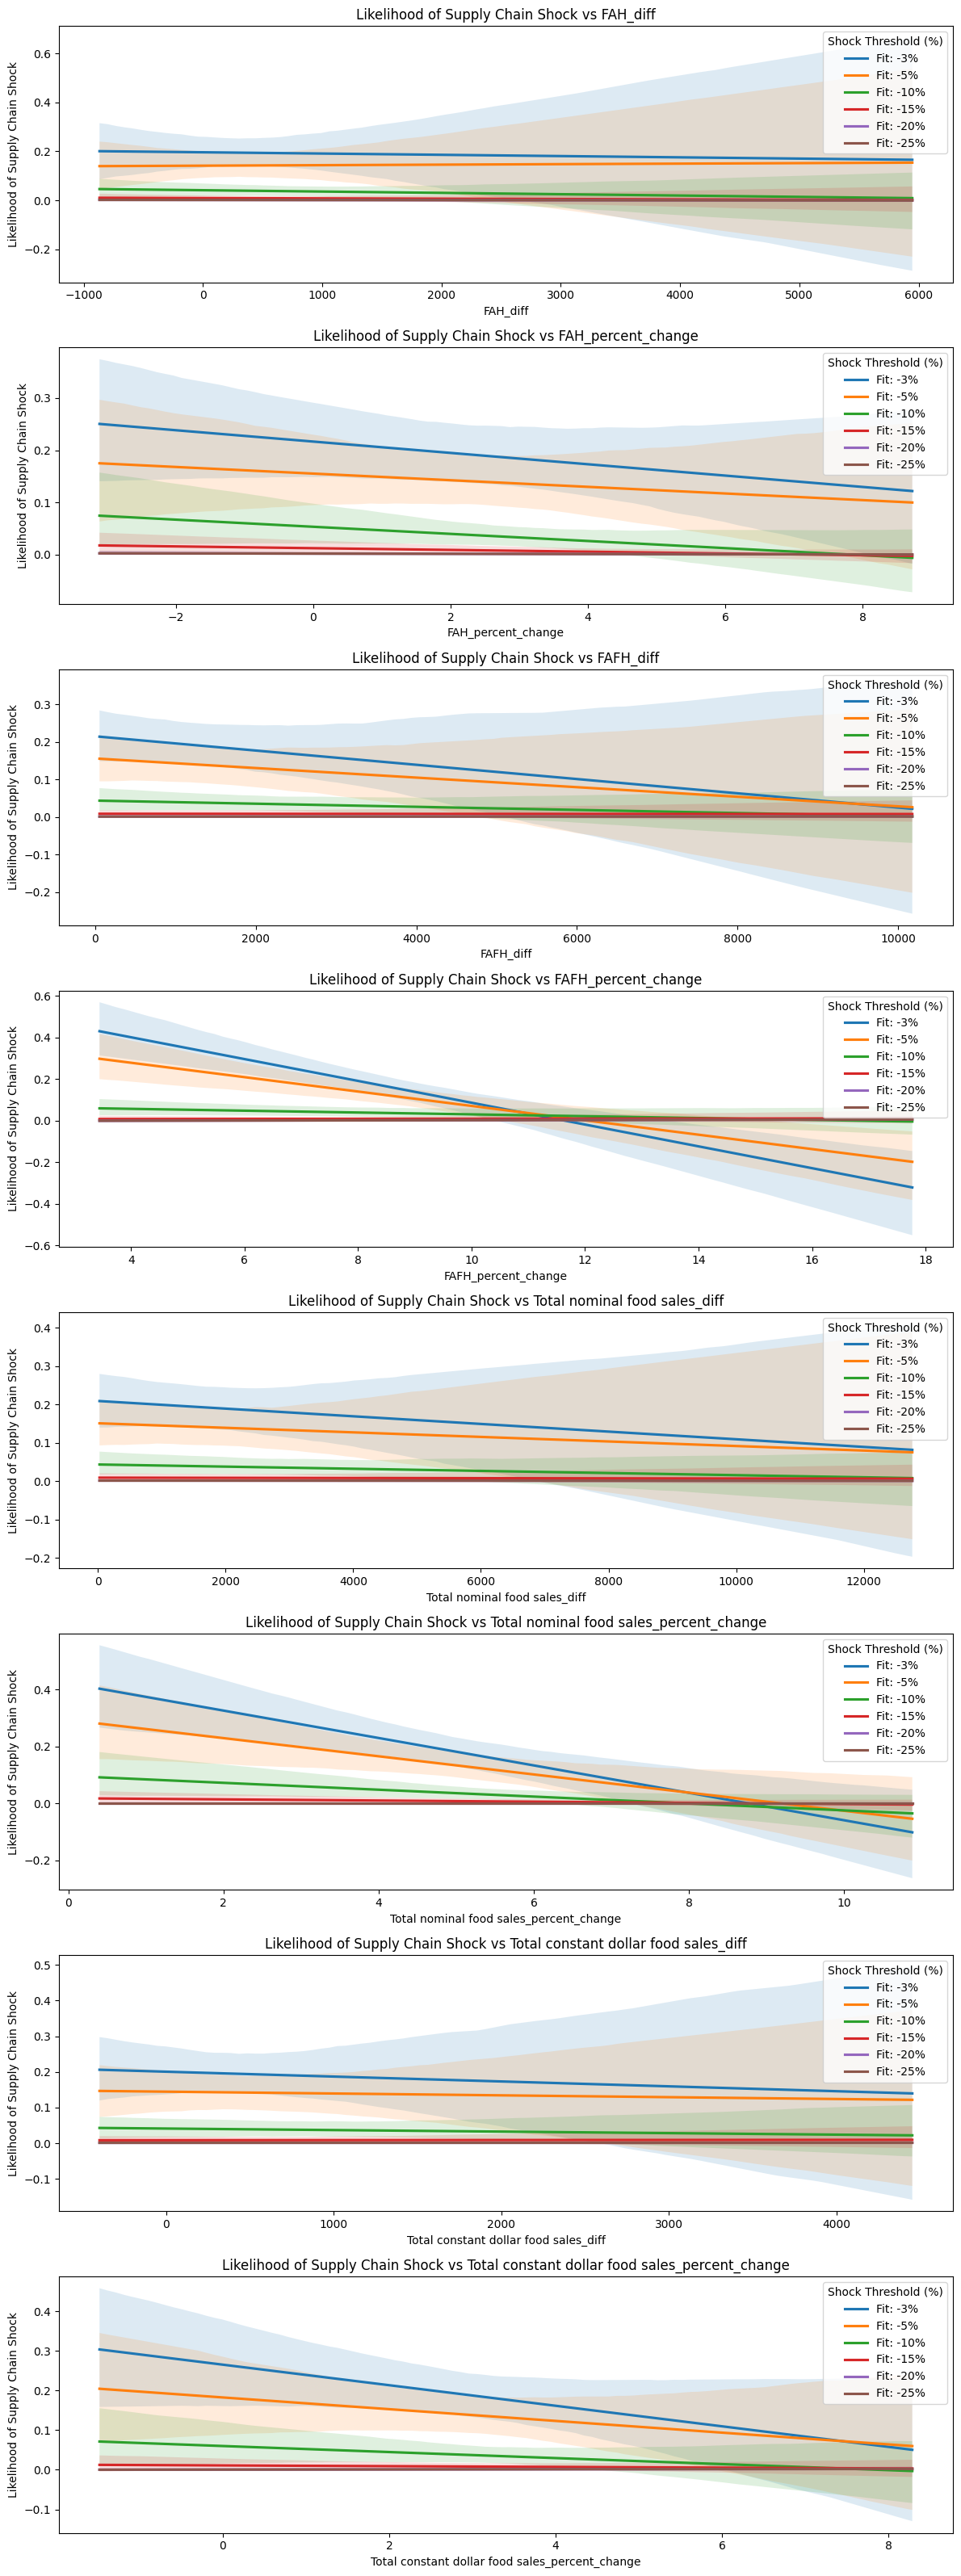

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('./final_agg_data.csv')

# Define shock thresholds
shock_thresholds = [-3, -5, -10, -15, -20, -25]

# Economic indicators
economic_indicators = [
    'FAH_diff', 
    'FAH_percent_change',
    'FAFH_diff',
    'FAFH_percent_change',
    'Total nominal food sales_diff',
    'Total nominal food sales_percent_change',
    'Total constant dollar food sales_diff',
    'Total constant dollar food sales_percent_change'
]

# Calculate likelihood of shock for each threshold
for threshold in shock_thresholds:
    df[f'supply_chain_shock_{threshold}'] = df['tons_percent_change'] < threshold

# Prepare DataFrames for plotting for each economic indicator
plot_data_dict = {indicator: [] for indicator in economic_indicators}

# Calculate likelihood of shock for each economic indicator and threshold
for threshold in shock_thresholds:
    for indicator in economic_indicators:
        grouped_data = df.groupby(indicator)[f'supply_chain_shock_{threshold}'].mean().reset_index()
        for _, row in grouped_data.iterrows():
            plot_data_dict[indicator].append({
                indicator: row[indicator], 
                'Likelihood': row[f'supply_chain_shock_{threshold}'], 
                'Threshold': threshold
            })

# Convert lists to DataFrames and plot each one
fig, axs = plt.subplots(len(economic_indicators), 1, figsize=(12, 4 * len(economic_indicators)))

for i, indicator in enumerate(economic_indicators):
    plot_df = pd.DataFrame(plot_data_dict[indicator])
    for threshold in shock_thresholds:
        sns.regplot(
            data=plot_df[plot_df['Threshold'] == threshold],
            x=indicator, y='Likelihood', 
            scatter=False, 
            ax=axs[i], 
            label=f'Fit: {threshold}%'
        )
    axs[i].set_title(f'Likelihood of Supply Chain Shock vs {indicator}')
    axs[i].set_xlabel(indicator)
    axs[i].set_ylabel('Likelihood of Supply Chain Shock')
    axs[i].legend(title='Shock Threshold (%)')

plt.tight_layout()
plt.show()
